In [1]:
%pip install -q pandas numpy sklearn yellowbrick

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("/content/sample_data/survey.csv", sep=",", header=0)

In [4]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


# Colunas da base de dados:

* **Timestamp**: Horário em que a pesquisa foi submetida
* **Age**: Idade da pessoa
* **Gender**: Gênero da pessoa
* **Country**: País de origem da pessoa
* **state:** Estado dos EUA, se for dos EUA
* **self_employed:** Você trabalha por conta própria?
* **family_history:** Você tem histórico familiar de doenças mentais?
* **treatment:** Você já procurou tratamento para uma doença mental?
* **work_interfere:** Se você tem uma doença mental, você acha que isso interfere com seu trabalho?
* **no_employees:** Quantos funcionários trabalham na sua empresa ou organização?
* **remote_work:** Você trabalha mais de 50% do tempo remotamente?
* **tech_company:** Sua empresa é uma empresa de tecnologia / informática?
* **benefits:** Sua empresa oferece benefícios de saúde mental?
* **care_options:** Sua empresa oferece opções de cuidados de saúde mental?
* **wellness_program:** Sua empresa tem um programa de bem-estar que aborda saúde mental?
* **seek_help:** Sua empresa fornece recursos para procurar ajuda para questões de saúde mental?
* **anonymity:** Você tem a opção de permanecer anônimo se você optar por tirar licença médica para questões de saúde mental?
* **leave:** A política de licença médica da sua empresa é amigável para pessoas com problemas de saúde mental?
* **mentalhealthconsequence:** Você acha que discutir um problema de saúde mental com seu empregador teria consequências negativas?
* **physhealthconsequence:** Você acha que discutir um problema de saúde física com seu empregador teria consequências negativas?
* **coworkers:** Você estaria disposto a discutir um problema de saúde mental com seus colegas de trabalho?
* **physhealthinterview:** Você estaria disposto a discutir um problema de saúde física com seu empregador em uma entrevista?
* **mentalvsphysical:** Com que frequência você acha que os problemas de saúde mental e física são tratados de forma igual em sua empresa?
* **obs_consequence:** Você já ouviu falar de um colega de trabalho que foi demitido ou deixou uma empresa por causa de problemas de saúde mental?
* **comments:** Quaisquer comentários adicionais ou observações


In [5]:
df.drop(columns=['Timestamp', 'comments', 'state'], inplace = True)

# Tratamento dos dados

## Considerações de Idade:
Idades precisam estar entre 15 e 100 anos.
Idades fora desse intervalo serão removidas.

In [6]:
df.drop(df[df['Age'] <= 15].index, inplace = True)
df.drop(df[df['Age'] > 100].index, inplace = True)

## Considerações de Gênero:

* Homem, significa nascido como homem e decide ser homem.
* Mulher, significa nascido como mulher e decide ser mulher.
* Outro, qualquer genero que não se encaixar nas duas definições acima.

In [7]:
df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

df['Gender'].value_counts()

Male      986
Female    247
Other      18
Name: Gender, dtype: int64

## Valores nulos:

* work_infere: representam apenas 20% dos dados, então vamos substituir por "Unknown".
* self_employed: representam apenas 1.4% dos dados, então vamos substituir por "No".

In [8]:
df['work_interfere'] = df['work_interfere'].fillna('Unknown')
print(df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' 'Unknown']


In [9]:
df['self_employed'] = df['self_employed'].fillna('No')

In [10]:
df.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [11]:
df.columns

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [12]:
from sklearn.preprocessing import LabelEncoder
object_cols = ['Gender', 'self_employed', 'family_history',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

#Label Encoding
le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])
df['treatment'] = le.fit_transform(df['treatment'])

#One Hot Encoding
df = pd.get_dummies(df)


In [13]:
# Resultado final
df.head()

,Age,Country,treatment,Gender_Female,Gender_Male,Gender_Other,self_employed_No,self_employed_Yes,family_history_No,family_history_Yes,...,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_Maybe,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_No,obs_consequence_Yes
0,37,44,1,1,0,0,1,0,1,0,...,1,0,1,0,0,0,0,1,1,0
1,44,44,0,0,1,0,1,0,1,0,...,1,0,0,1,0,1,0,0,1,0
2,32,6,0,0,1,0,1,0,1,0,...,0,1,0,0,1,0,1,0,1,0
3,31,43,1,0,1,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1
4,31,44,0,0,1,0,1,0,1,0,...,0,1,0,0,1,1,0,0,1,0


# Treinamento do modelo

In [14]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report, precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn import metrics

In [15]:
yvalues = df["treatment"]
xvalues = df.drop("treatment", axis = 1)
xtrain, xtest, ytrain, ytest = train_test_split(xvalues, yvalues, test_size=0.2, random_state=123, stratify = yvalues)

print(xvalues.shape)
print(yvalues.shape)

(1251, 67)
(1251,)


In [16]:
yvalues.value_counts()

1    632
0    619
Name: treatment, dtype: int64

In [17]:
ytrain.value_counts()

1    505
0    495
Name: treatment, dtype: int64

In [18]:
ytest.value_counts()

1    127
0    124
Name: treatment, dtype: int64

In [22]:
params = {'criterion':  ['gini', 'entropy'], 'max_depth':  [None, 2, 4, 6, 8, 10], 'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8]}

GRF_Model = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, cv=5, n_jobs=5, verbose=1)

GRF_Model.fit(xtrain, ytrain)

print(GRF_Model.best_params_)
print(GRF_Model.best_score_)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt'}
0.8379999999999999


In [23]:
print(classification_report(ytest, GRF_Model.predict(xtest)))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80       124
           1       0.78      0.89      0.83       127

    accuracy                           0.82       251
   macro avg       0.82      0.82      0.82       251
weighted avg       0.82      0.82      0.82       251



/usr/local/lib/python3.10/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


0.8167330677290837

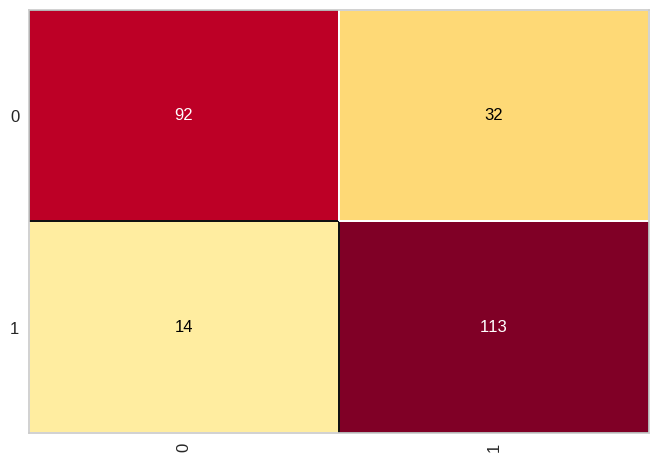

In [24]:
from yellowbrick.classifier import ConfusionMatrix
cm_random = ConfusionMatrix(GRF_Model)
cm_random.score(xtest, ytest)